In [22]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
data = load_breast_cancer()
x = data.data
y = data.target
x.shape

(569, 30)

In [4]:
#正则化l1和l2,通过对损失函数的数学计算得出
#正则化超参数 'C'
#正则化防止模型过拟合
lml1 = LR(penalty = "l1", solver = "liblinear", C = 0.5, max_iter = 1000)
lml2 = LR(penalty = "l2", solver = "liblinear", C = 0.5, max_iter = 1000)

In [5]:
lml1 = lml1.fit(x,y)
lml1.coef_

array([[ 3.99232933,  0.03149874, -0.13611034, -0.016199  ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50313316,  0.        , -0.07122264,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.2453719 , -0.12832101, -0.01443126,  0.        ,
         0.        , -2.05067436,  0.        ,  0.        ,  0.        ]])

In [10]:
lml2 = lml2.fit(x,y)
lml2.coef_

array([[ 1.61541411e+00,  1.02300859e-01,  4.79634999e-02,
        -4.45030890e-03, -9.43136469e-02, -3.01439405e-01,
        -4.56192113e-01, -2.22484448e-01, -1.35800316e-01,
        -1.93953254e-02,  1.60057189e-02,  8.84862500e-01,
         1.19637597e-01, -9.46955296e-02, -9.82838672e-03,
        -2.36327058e-02, -5.71011111e-02, -2.70319142e-02,
        -2.77745541e-02,  2.15950986e-04,  1.26261246e+00,
        -3.01767368e-01, -1.72676431e-01, -2.21705021e-02,
        -1.73511093e-01, -8.79035647e-01, -1.16340871e+00,
        -4.27935079e-01, -4.21045045e-01, -8.69853368e-02]])

In [6]:
#计算不等于0的特征
#l2不会舍弃特征,l1会让参数为0
(lml1.coef_ != 0).sum(axis = 1)

array([10])

In [15]:
(lml2.coef_ != 0).sum(axis = 1)

array([30])

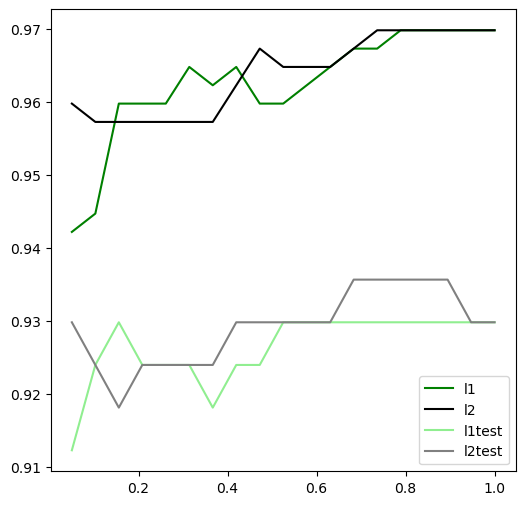

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3, random_state = 420)

l1 = []
l2 = []
l1test = []
l2test = []

for i in np.linspace(0.05,1,19): #在0.05-1之间取19个随机数
    lml1 = LR(penalty = "l1", solver = "liblinear", C = i, max_iter = 1000)
    lml2 = LR(penalty = "l2", solver = "liblinear", C = i, max_iter = 1000)
    
    lml1 = lml1.fit(xtrain,ytrain)
    l1.append(accuracy_score(lml1.predict(xtrain),ytrain))
    l1test.append(accuracy_score(lml1.predict(xtest),ytest))
    
    lml2 = lml2.fit(xtrain,ytrain)
    l2.append(accuracy_score(lml2.predict(xtrain),ytrain))
    l2test.append(accuracy_score(lml2.predict(xtest),ytest))
    
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","grey"]
label = ["l1","l2","l1test","l2test"]
    
plt.figure(figsize = (6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label = label[i])
plt.legend(loc = 0)
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [14]:
data = load_breast_cancer()
x = data.data
y = data.target

In [22]:
LR_ = LR(solver = "liblinear", C = 0.8, random_state = 180)
cross_val_score(LR_,x,y,cv = 10).mean()

0.9508145363408522

In [26]:
X_embedded = SelectFromModel(LR_,norm_order = 1).fit_transform(x,y)
X_embedded.shape
#特征从30个降到了9个

(569, 9)

In [28]:
cross_val_score(LR_,X_embedded,y,cv = 10).mean()

0.9368107769423559

In [30]:
#调参
#对threshold画学习曲线
LR_.fit(x,y).coef_

array([[ 1.95753458,  0.11107568, -0.03228246, -0.00337115, -0.13602987,
        -0.37163773, -0.58838401, -0.30521437, -0.19834361, -0.02386318,
        -0.01123206,  1.13012275,  0.04889997, -0.09477566, -0.01480643,
        -0.00342517, -0.05057289, -0.03624471, -0.03784927,  0.00451997,
         1.26085012, -0.32803758, -0.13718982, -0.02371884, -0.25160911,
        -1.05652533, -1.45726921, -0.58737219, -0.60923766, -0.1057017 ]])

In [32]:
abs(LR_.fit(x,y).coef_).max()

1.9575345804035076

0.0 30
0.06750119242770716 18
0.13500238485541433 15
0.2025035772831215 12
0.27000476971082865 11
0.3375059621385358 9
0.405007154566243 8
0.47250834699395017 8
0.5400095394216573 8
0.6075107318493644 6
0.6750119242770716 5
0.7425131167047788 5
0.810014309132486 5
0.8775155015601931 5
0.9450166939879003 5
1.0125178864156075 5
1.0800190788433146 4
1.1475202712710217 3
1.2150214636987289 3
1.282522656126436 2
1.3500238485541431 2
1.4175250409818505 2
1.4850262334095576 1
1.5525274258372648 1
1.620028618264972 1
1.687529810692679 1
1.7550310031203862 1
1.8225321955480933 1
1.8900333879758007 1
1.9575345804035076 1


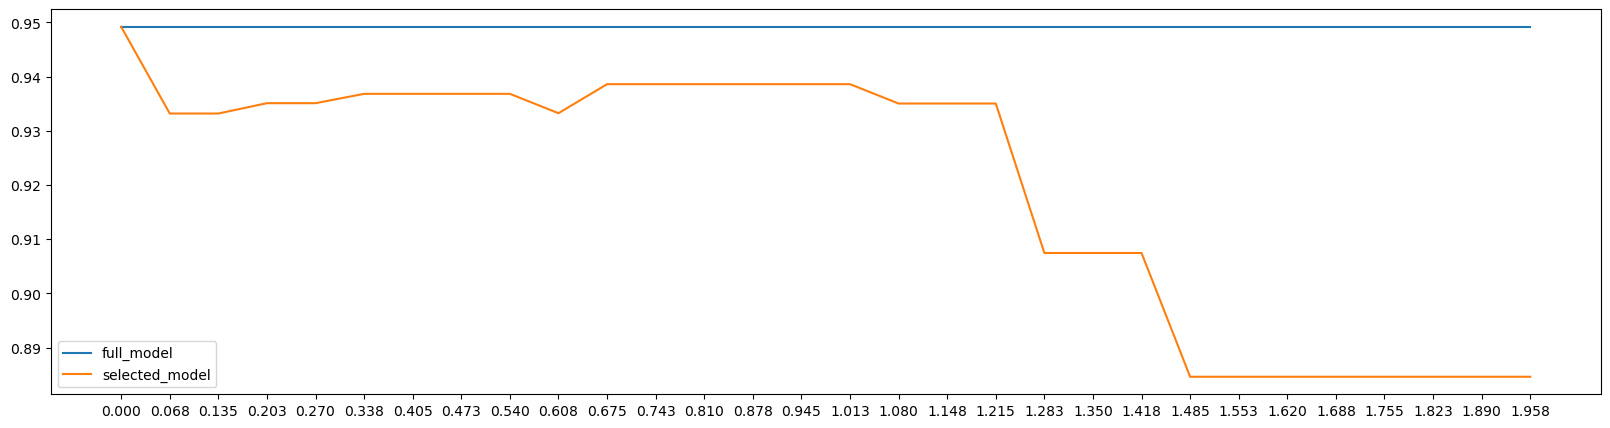

In [46]:
threshold = np.linspace(0,abs(LR_.fit(x,y).coef_).max(),30)

full_model = []
selected_model = []
k = 0

for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold = i,norm_order = 1).fit_transform(x,y)
    full_model.append(cross_val_score(LR_,x,y,cv = 20).mean())
    selected_model.append(cross_val_score(LR_,X_embedded,y,cv = 20).mean())
    print(threshold[k],X_embedded.shape[1]) #threshold列表取值和特征数目
    k+=1
    
plt.figure(figsize = (20,5))
plt.plot(threshold,full_model,label = "full_model")
plt.plot(threshold,selected_model,label = "selected_model")
plt.xticks(threshold)
plt.legend()
plt.show()

0.9562192118226601 7.51


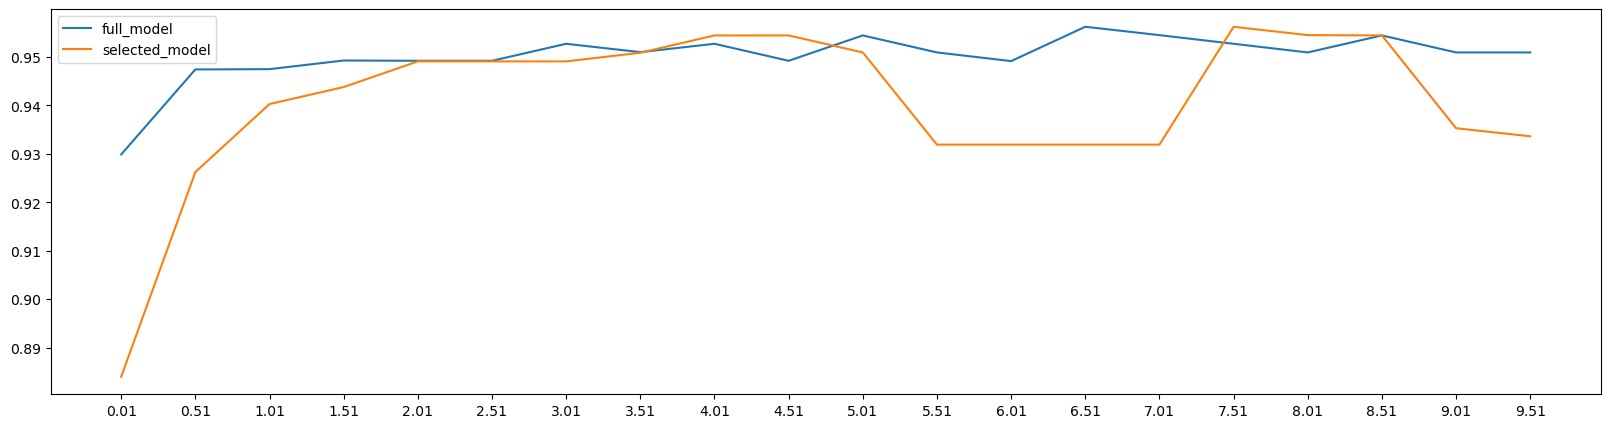

In [58]:
#调参
#对C画学习曲线
full_model = []
selected_model = []
C = np.arange(0.01,10.01,0.5)

for i in C:
    LR_ = LR(solver = "liblinear", C = i, random_state = 500)
    full_model.append(cross_val_score(LR_,x,y,cv = 20).mean())
    X_embedded = SelectFromModel(LR_,norm_order = 1).fit_transform(x,y)
    selected_model.append(cross_val_score(LR_,X_embedded,y,cv = 20).mean())
print(max(selected_model),C[selected_model.index(max(selected_model))]) #返回交叉验证所得的最高分数,及最高分数所对应的C值
    
plt.figure(figsize = (20,5))
plt.plot(C,full_model,label = "full_model")
plt.plot(C,selected_model,label = "selected_model")
plt.xticks(C)
plt.legend(loc = 0)
plt.show()

0.9562192118226601 7.144999999999997


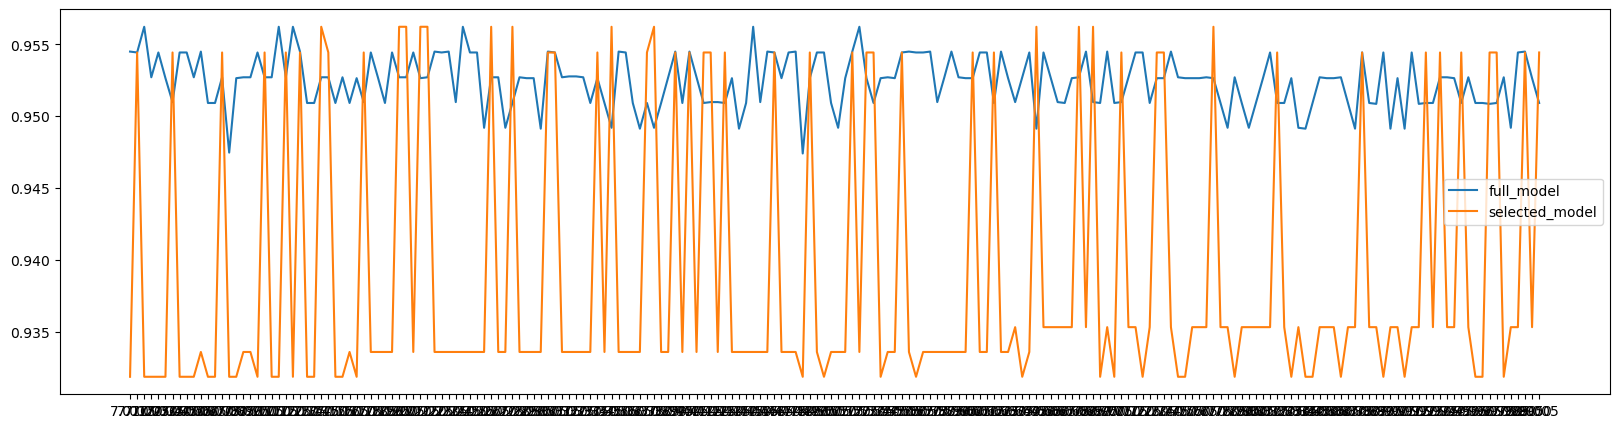

In [60]:
full_model = []
selected_model = []
C = np.arange(7.01,8.01,0.005)

for i in C:
    LR_ = LR(solver = "liblinear", C = i, random_state = 500)
    full_model.append(cross_val_score(LR_,x,y,cv = 20).mean())
    X_embedded = SelectFromModel(LR_,norm_order = 1).fit_transform(x,y)
    selected_model.append(cross_val_score(LR_,X_embedded,y,cv = 20).mean())
print(max(selected_model),C[selected_model.index(max(selected_model))]) #返回交叉验证所得的最高分数,及最高分数所对应的C值
    
plt.figure(figsize = (20,5))
plt.plot(C,full_model,label = "full_model")
plt.plot(C,selected_model,label = "selected_model")
plt.xticks(C)
plt.legend(loc = 0)
plt.show()

In [61]:
LR_ = LR(solver = "liblinear", C = 7.144999999999997, random_state = 500)
cross_val_score(LR_,x,y,cv = 10).mean()

0.9473057644110275

In [63]:
LR_ = LR(solver = "liblinear", C = 7.144999999999997, random_state = 500)
X_embedded = SelectFromModel(LR_,norm_order = 1).fit_transform(x,y)
cross_val_score(LR_,X_embedded,y,cv = 10).mean()

0.9561090225563911

In [ ]:
X_embedded.shape
#最终维度被降到了9个特征

A:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
A:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
A:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


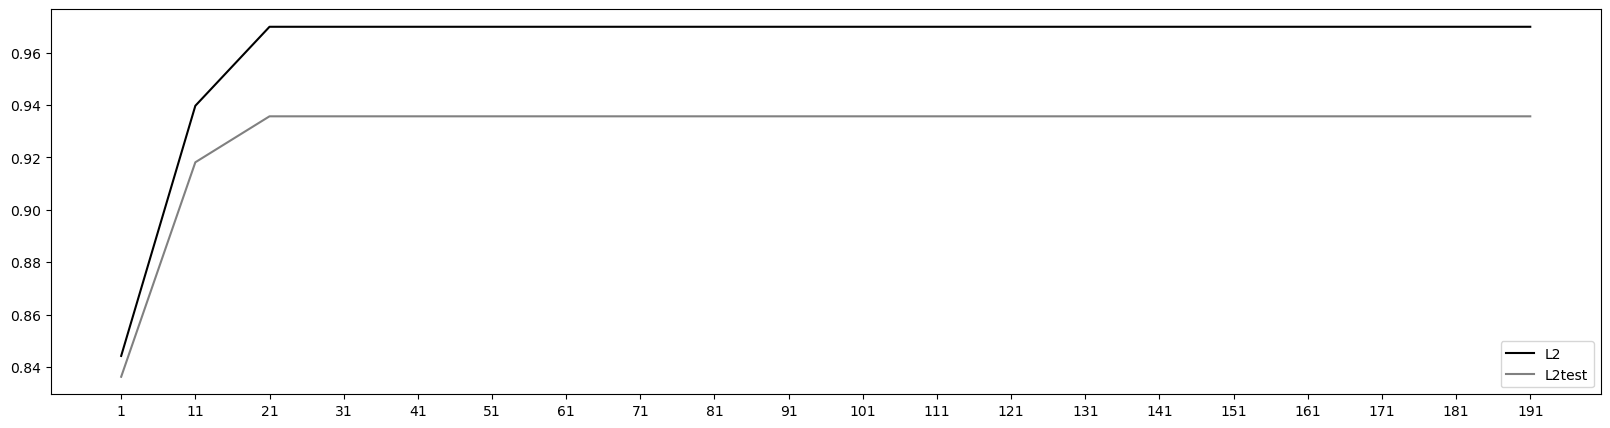

In [18]:
#调参
#对max_iter画学习曲线
l2 = []
l2test = []

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3, random_state = 420)

for i in np.arange(1,201,10):
    lrl2 = LR(penalty = "l2", solver = "liblinear", C = 0.8, max_iter = i)
    lrl2 = lrl2.fit(xtrain,ytrain)
    l2.append(accuracy_score(lrl2.predict(xtrain),ytrain))
    l2test.append(accuracy_score(lrl2.predict(xtest),ytest))

graph = [l2,l2test]
color = ["black","grey"]
label = ["L2","L2test"]
    
plt.figure(figsize = (20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label = label[i])
plt.xticks(np.arange(1,201,10))
plt.legend(loc = 4)
plt.show()

In [16]:
lr = LR(penalty = "l2", solver = "liblinear", C = 0.8, max_iter = 50).fit(xtrain,ytrain)
lr.n_iter_

array([24], dtype=int32)

In [ ]:
##所有求解器
#liblinear
#lbfgs 好
#newton-cg
#sag
#saga 好

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
for multi_class in ('multinomial','ovr'):
    lr = LR(solver = "saga",max_iter = 1000, random_state = 420,
            multi_class = multi_class).fit(iris.data,iris.target)
    print("training score:%.3f(%s)" % (lr.score(iris.data,iris.target),multi_class))
#打印两种模式训练分数
#ovr处理二分类
#multinomial处理多分类
#auto自动选择

training score:0.987(multinomial)
training score:0.960(ovr)


A:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
A:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
A:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
